<a href="https://colab.research.google.com/github/pedropvsn/Oncase/blob/main/Oncase_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Importando as bibliotecas que normalmente são utilizadas em ciencia de dados
import statsmodels.api as sm
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **BASES DE DADOS**

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df_receita = pd.read_excel("/content/drive/My Drive/Colab/Oncase q1/Receita_json_Oficial.xlsx")

df_receita.head(5) ## percebe-se a presença de dados nulos "NaN"

,Column1.fat,Column1.date,Column1.categories,Column1.calories,Column1.protein,Column1.rating,Column1.title,Column1.sodium
0,7.0,2006-09-01T04:00:00.000Z,Sandwich,426.0,30.0,2.5,"Lentil, Apple, and Turkey Wrap",559.0
1,7.0,2006-09-01T04:00:00.000Z,Bean,426.0,30.0,2.5,"Lentil, Apple, and Turkey Wrap",559.0
2,7.0,2006-09-01T04:00:00.000Z,Fruit,426.0,30.0,2.5,"Lentil, Apple, and Turkey Wrap",559.0
3,7.0,2006-09-01T04:00:00.000Z,Tomato,426.0,30.0,2.5,"Lentil, Apple, and Turkey Wrap",559.0
4,7.0,2006-09-01T04:00:00.000Z,turkey,426.0,30.0,2.5,"Lentil, Apple, and Turkey Wrap",559.0


In [30]:
df_receita.shape

(244663, 8)

Renomear variáveis

In [31]:
df_receita.rename(columns={'Column1.fat': 'fat',
                           'Column1.date': 'date',
                           'Column1.categories': 'categories',
                           'Column1.calories': 'calories',
                           'Column1.protein': 'protein',
                           'Column1.rating': 'rating',
                           'Column1.title': 'title',
                           'Column1.sodium': 'sodium'  }, inplace = True)

Validar se as células NaN foram excluídas

In [32]:
df_receita.isnull().sum() #quantidade de nulos por coluna

fat           51810
date             19
categories       78
calories      51343
protein       51622
rating           30
title            19
sodium        51347
dtype: int64

In [34]:
df_receita.dropna(axis=0, inplace=True)

## Tratando valores nulos da base Receita

In [35]:
df_receita.isnull().sum() #quantidade de nulos por coluna 

fat           0
date          0
categories    0
calories      0
protein       0
rating        0
title         0
sodium        0
dtype: int64

## Análise de Correlação

In [48]:
#matriz de correlação
corr = df_receita.corr()
corr

,fat,calories,protein,rating,sodium
fat,1.00e+00,9.97e-01,0.69,7.84e-03,9.88e-01
calories,9.97e-01,1.00e+00,0.71,8.44e-03,9.97e-01
protein,6.86e-01,7.12e-01,1.00,1.56e-02,7.10e-01
rating,7.84e-03,8.44e-03,0.02,1.00e+00,8.55e-03
sodium,9.88e-01,9.97e-01,0.71,8.55e-03,1.00e+00


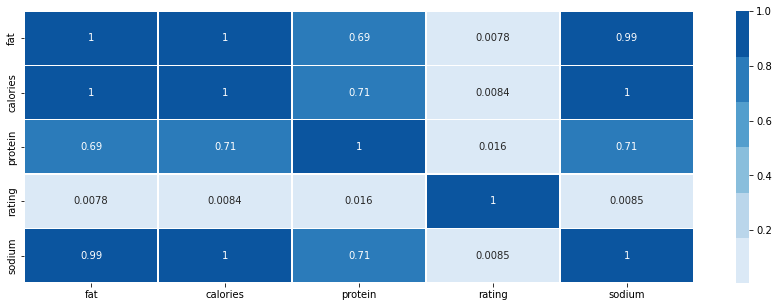

In [37]:
#Analisando a correlação graficamente

f, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(corr, cmap = sns.color_palette("Blues"), linewidths=.5, annot=True);

Ao realizar uma análise de correlação verificamos que a variável rating, apresenta baixa relação com a a quantidade de gordura, calorias, proteína e sódium contido no prato.

## Medidas descritivas da base

In [50]:
df_receita.describe()

,fat,calories,protein,rating,sodium
count,1.93e+05,1.93e+05,192780.00,192780.00,1.93e+05
mean,3.84e+02,7.00e+03,115.12,3.82,6.77e+03
std,2.11e+04,3.72e+05,4281.95,1.21,3.44e+05
min,0.00e+00,0.00e+00,0.00,0.00,0.00e+00
25%,8.00e+00,2.00e+02,3.00,3.75,7.80e+01
50%,1.70e+01,3.31e+02,8.00,4.38,2.78e+02
75%,3.20e+01,5.72e+02,24.00,4.38,6.77e+02
max,1.72e+06,3.01e+07,236489.00,5.00,2.77e+07


In [53]:
pd.set_option("display.max_rows", 99999)
pd.set_option("display.precision", 2)

In [57]:
pd.reset_option("^display")

df_teste.isnull().sum() #avaliação da quantidade de nulos por coluna

In [58]:
df_receita.describe()

,fat,calories,protein,rating,sodium
count,1.927800e+05,1.927800e+05,192780.000000,192780.000000,1.927800e+05
mean,3.842324e+02,6.999750e+03,115.120573,3.819636,6.765117e+03
std,2.113763e+04,3.716581e+05,4281.952010,1.209055,3.440233e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,8.000000e+00,2.000000e+02,3.000000,3.750000,7.800000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.780000e+02
75%,3.200000e+01,5.720000e+02,24.000000,4.375000,6.770000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07
